In [6]:
from scipy import sparse
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib 
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sklearn

In [7]:
import mglearn

In [4]:
# %matplotlib inLine
# import matplotlib.pyplot as plt 
# 는 브라우저에서 바로 그림 볼 수 있음, 이거 안치면 plt.show() 명령어를 무조건 쳐줘야함

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
#훈련 데이터와 테스트 데이터

In [34]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [12]:
print("X_train 크기", X_train.shape)
print("y_train 크기", y_train.shape)

X_train 크기 (112, 4)
y_train 크기 (112,)


In [13]:
#numpy 를 dataframe 으로 변경
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020132F63788>,
      dtype=object)

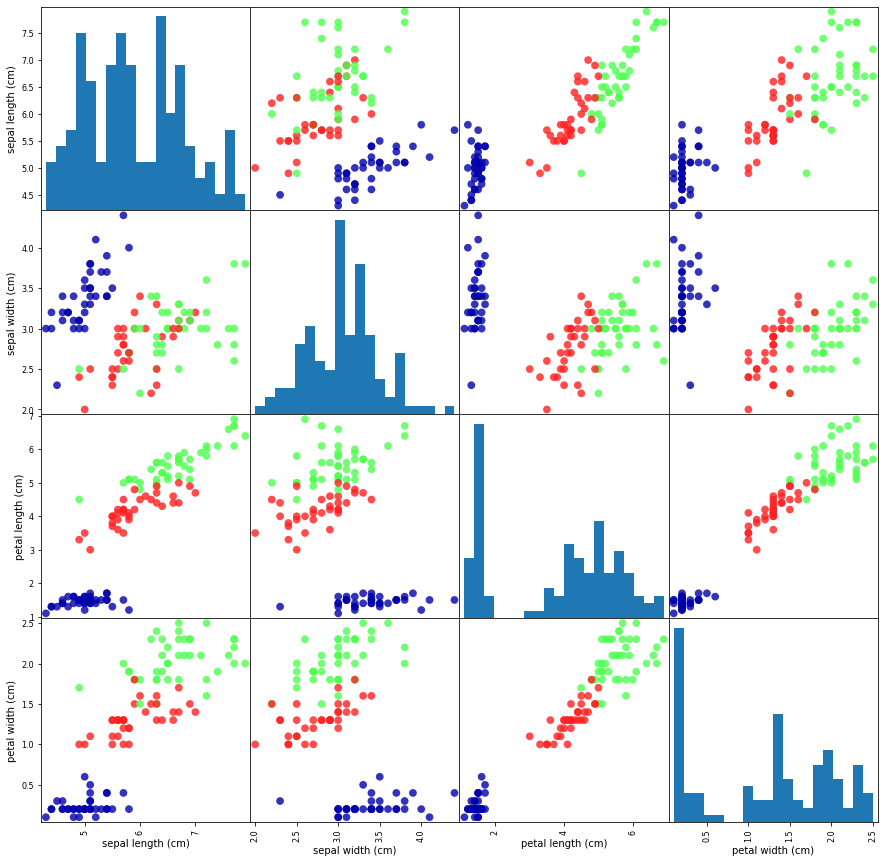

In [14]:
#y_train에 따라 색으로 구분된 산점도 행렬
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, 
                           cmap=mglearn.cm3)

In [15]:
#1. KNN 최근접 이웃 알고리즘

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #이웃 지정값

In [16]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
#모델을 만들려면 knn 객체의 fit 메서드를 사용. 훈련데이터 NumPy 배열 X_train 과 y_train 을 매개변수로 받는다.

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
#예측하기
#야생의 뚜벅초가 나타났다!

X_new = np.array([[5, 2.9, 1, 0.2]]) #새로운 붓꽃사이즈 데이터 입력
print(X_new)
print(X_new.shape)

[[5.  2.9 1.  0.2]]
(1, 4)


In [21]:
#predict 메소드는 학습된 모델에 새로운 데이터를 넣어서 예측해본다.
prediction = knn.predict(X_new)
print("예측 : ", prediction)
print("예측한 타깃의 이름 : ", iris_dataset['target_names'][prediction]) # 0에는 setosa가 들어있음...!

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


In [22]:
X_test.shape #38 row, 4 column

(38, 4)

In [23]:
#모델 평가하기
#앞에 만든 테스트 데이터를 사용하여 판단한다.

y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측 값 : \n", y_pred)

테스트 세트에 대한 예측 값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
#테스트 세트 정확도 평가

print("테스트 세트 정확도 : {:.2f}".format(np.mean(y_pred == y_test))) # {:.2f} 는 숫자값 string으로 변환시켜서 붙여주는듯?

테스트 세트 정확도 : 0.97


In [25]:
#정리
# 붓꽃데이터 셋은 2 개의 Numpy 배열로 이루어짐, 데이터인 X와 라벨인 y 임
# 배열 X는 특성들의 2차원 배열이다. [0.4, 0.2, 2.9, 1.5] 값이 여러개 있어서 [[]] 화 됨

In [26]:
#scikit learn 은 fit, predict, score 지도 학습 모델의 핵심이자 공동 인터페이스 이다.

##### C2 지도 학습

In [27]:
#분류와 회귀

#분류는 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것이다.
#분류 : 1. 이진 분류 / 2. 다중 분류

#회귀는 연속적인 숫자, 부동소수점수(실수)를 예측하는 것임.
#회귀 : 어떤 사람의 data를 통해서 연간소득(실수) 를 예측하는 것이 회구의 문제임.

In [28]:
#일반화, 과대적합, 과소적합

#일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면, 이를 훈련 세트에서 테스트 세트로 일반화 (called)
#과대적합 : 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것, 훈련 세트 샘플에 너무 가깝게 맞춰져 일반화하기 어렵
#과소적합  : 데이터의 면면과 다양성을 잡아내지 못하여, 너무 간단한 모델이 되버림

#! 중요 : 모델이 복잡하면 훈련 데이터에 대해서는 더 정확히 예측하나 너무 복잡해지면 새로운 데이터를 일반화 하지 못한다.
# 최적화가 제일 중요함

In [29]:
# 데이터 포인트에서, 중복 Feature 나 비슷한 Feature는 도움이 되지 않는다.
# 최적화는 어느정도의 도메인 지식(해당 데이터에서 중요 데이터 포인트가 무엇인가)

X.shape: (26, 2)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


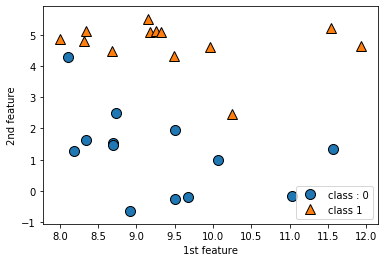

In [30]:
# 이진 분류 알고리즘

#데이터셋 만들기
X, y = mglearn.datasets.make_forge() #산점도 만들기
#산점도 drawing
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["class : 0", "class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape:", X.shape)

In [31]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [32]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [33]:
#회귀

X1, y1 = mglearn.datasets.make_wave(n_samples=40)

In [34]:
X1

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504]])

In [35]:
y1

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153,
       -1.05979555,  0.7789638 ,  0.75418806, -1.51369739, -1.67303415,
       -0.90496988,  0.08448544, -0.52734666, -0.54114599, -0.3409073 ,
        0.21778193, -1.12469096,  0.37299129,  0.09756349, -0.98618122,
        0.96695428, -1.13455014,  0.69798591,  0.43655826, -0.95652133,
        0.03527881, -2.08581717, -0.47411033,  1.53708251,  0.86893293,
        1.87664889,  0.0945257 , -1.41502356,  0.25438895,  0.09398858])

Text(0, 0.5, 'target')

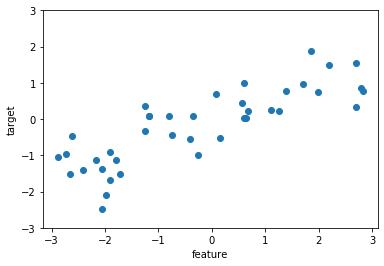

In [36]:
plt.plot(X1, y1, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

In [37]:
#회귀는 연속형 숫자를 예측하는 것을 잊지마.

In [38]:
#01.03 이어서 공부

#암 예측 데이터

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [40]:
print("데이터 형태(shape) :", cancer.data.shape)

데이터 형태(shape) : (569, 30)


In [41]:
print("클래스 별 샘플 개수 : \n",
     {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

#212개는 악성, 357개는 양성

클래스 별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [42]:
#회귀 데이터

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 형태", boston.data.shape)

#보스턴의 범죄율, 찰스강 인접도, 고속도로 접근성 정보를 통해 1970년도 보스턴 주변 주택 평균 가격 예측

데이터 형태 (506, 13)


In [43]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [44]:
#특성공학 : 특성끼리의 셈등 유도를 통해 새로운 특성을 만들어낸 것

In [45]:
X2, y2 = mglearn.datasets.load_extended_boston()
print("X2.shape", X2.shape)

X2.shape (506, 104)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


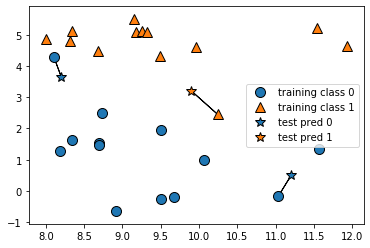

In [46]:
#KNN (K nearest Neighbors) 다시 살펴보기

mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


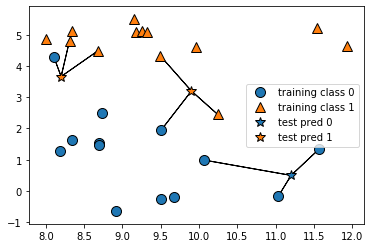

In [47]:
#새로 관측된 데이터가, 기존 학습 데이터 이웃 3개와 거리상으로 가까이있을때, 해당 라벨링으로 판단을함
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [48]:
#위 그림은 이진분류 문제이긴 하지만, 클래스가 다수인 데이터셋에서도 같은 방법을 적용할 수 있음.
#클래스가 여러개 일때도 각 클래스에 속한 이웃이 몇개인지를 헤아릴 수 있다.

In [49]:
#일반화 성능 평가

from sklearn.model_selection import train_test_split
X3, y3 = mglearn.datasets.make_forge()

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [50]:
X3_train.shape

(19, 2)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# 객체 생성, 이웃 3개 
clf = KNeighborsClassifier(n_neighbors=3)

In [52]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
clf.fit(X3_train,y3_train) #데이터 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
print("테스트 세트 예측:", clf.predict(X3_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [55]:
y3_test # 위 KNN 객체랑 비교했을때 5번째가 1이랑 0이 다름, 요거 하나빼고는 나머지 다 맞게 예측함

array([1, 0, 1, 0, 1, 1, 0])

In [56]:
#score 메소드로 테스트 데이터와 테스트 레이블을 넣어 호출

print("테스트 세트 정확도: {:.2f}".format(clf.score(X3_test, y3_test)))

#테스트 데이터 셋에 있는 샘플 중 86%를 정확하게 예측함

테스트 세트 정확도: 0.86


In [57]:
#KNeighborsClassifier 분석

#2차원 데이터 셋이라 xy 평면에 그릴 수 있긴 함, 그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함
#결정경계(Decision boundary) : 알고리즘이 클래스 0과 클래스 1 로 지정한 영역으로 나뉘는 결정경계를 볼 수 있음

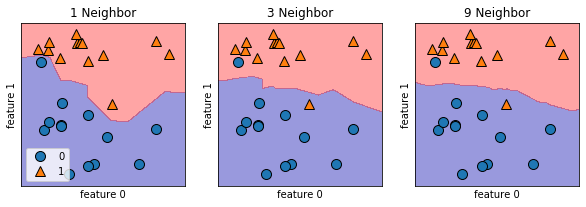

In [58]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes): 
    #x와 y로 [1,3,9] / [axes] 에는 그래프를 담는듯?
    #fit 메소드는 self 오브젝트를 리턴함
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y3)
    mglearn.plots.plot_2d_separator(clf, X3, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X3[:,0], X3[:,1], y3, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

In [59]:
#이웃 하나는 결정 경계가 훈련 데이터에 가깝게 따라감
#수를 늘릴수록 결정 경계는 더욱 부드러워짐 -> 부드러움은 단순한 모델을 의미함.
#이웃이 적으면 모델의 복잡도가 높아짐.
#모든 특징을 학습시킬 경우는 train 학습 데이터만 예측할 수 있는 overfitting 모델이 되버릴 수 있을듯

#최적화가 중요하겠지?

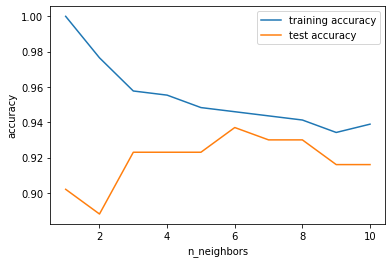

In [60]:
#cancer 데이터로 train/test 해보자

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X4_train, X4_test, y4_train, y4_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#1에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X4_train, y4_train)
    
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X4_train, y4_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X4_test, y4_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel("n_neighbors")
plt.legend()

In [61]:
# 모델의 이웃이 1개 일 경우, training data 의 정확도는 과대적합 되어있음.
# 이웃이 적다 -> 모델이 복잡하다 -> 훈련 데이터 예측이 완벽하다 -> 과대적합이다.
# 반면, test 정확도는 0.9 정도임..!

#최적화는 이웃 6개 정도로 하여, 훈련과 테스트의 중간 지점을 찾아야함.

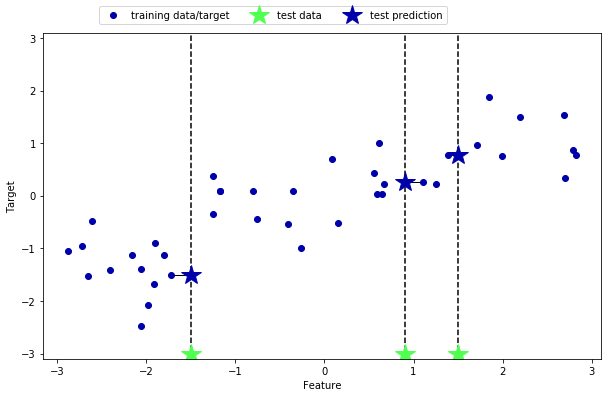

In [62]:
# KNN 회귀

mglearn.plots.plot_knn_regression(n_neighbors=1) #이웃 1개

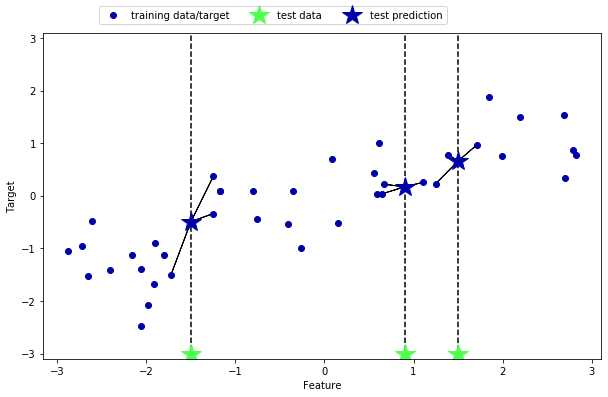

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors=3) #이웃 1개

In [64]:
#사이킷런  KNN 회귀

from sklearn.neighbors import KNeighborsRegressor

X5, y5 = mglearn.datasets.make_wave(n_samples=40)

#KN Regressor 의 weights 매개변수가 기본값 uniform 일때는 np.mean 함수를 사용하여 단순 평균 계산
#distance 일때는 거리를 고려한 가중치 평균(average)를 계산함

In [65]:
#wave 데이터 셋을 훈련 세트와 테스트 세트로 나눔

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3) #이웃 3개, 회귀객체
reg.fit(X5_train, y5_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
print("테스트 세트 예측 : \n", reg.predict(X5_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [67]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X5_test,y5_test)))

#R^2 값은 결정계수라고도 함. 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0과 1 사이 값임
#0은 훈련 세트 출력값인 y_train의 평균으로만 예측
#1은 예측이 완벽한 경우를 의미함

테스트 세트 R^2: 0.83


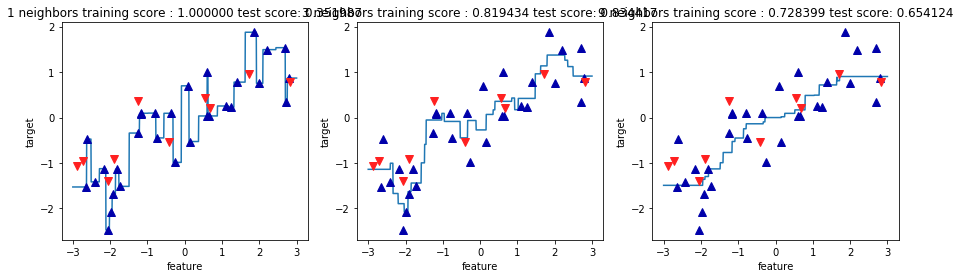

In [68]:
#Kneighbors Regressor 분석

fig2, axes2= plt.subplots(1,3, figsize=(15,4))
#-3과 3 사이에 1,000개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes2):
    #1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X5_train, y5_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X5_train, y5_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X5_test, y5_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
         "{} neighbors training score : {:2f} test score: {:2f}".format(
             n_neighbors, reg.score(X5_train, y5_train),
             reg.score(X5_test, y5_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predict", "train data/target", "test data/target"], loc="best")

In [69]:
#장단점과 매개변수

#KNeighbors 분류기에 중요한 매개변수는 1. 거리를 재는 방법 2. 이웃의 수 
#실제로 이웃은 3,5개 정도로 적을때 잘 작동함. / 거리는 유클리디안 거리 방식을 이용함
#Kneighbors 객체 생성시, metric 매개 변수를 사용하여 거리 측정 방식을 변경가능
#metric 기본값은 민코프스키 거리 (minkowski) 이며, 거듭제곱의 크기를 정하는 매개변수인 p 가 기본값 2일때는 유클리디안

##### 선형 모델

In [70]:
#Linear model 선형 모델

#회귀 선형 모델 y = w[n]+x[n]+b 로서, y= ax +b 와 같은 모양이라 생각해도 됨

#모델 파라미터(parameter) : ML 알고리즘이 주어진 데이터로부터 학습하는 파라미터를 모델 파라미터라 함.
#parameter, 계수라고도 부름.
#하이퍼 파라미터 : 모델이 학습할 수 없어, 사람이 직접 설정해줘야함. (매개변수라고도 부름)

w[0]: 0.393906  b: -0.031804


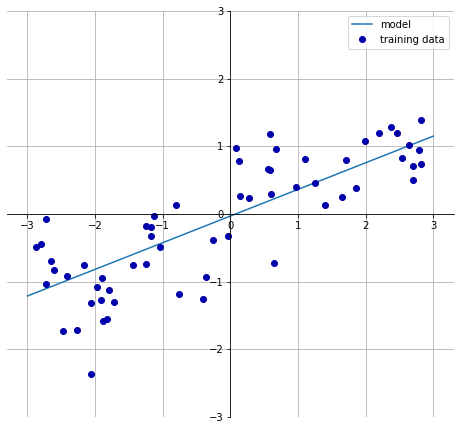

In [71]:
mglearn.plots.plot_linear_regression_wave()

In [72]:
#직선..
#타깃 y가 특성들의 선형 조합이라는 것은 때론 비현실적인 가정이 될수도 있음.
#하지만, 이는 1차원 데이터만 놓고 봐서  매우 훌륭한 성능을 낼 수 있음.
#특히, 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 (훈련 세트에 대해서) 선형 함수로 모델링이 가능하다.
#이는 선형 대수에서 방정식(훈련 데이터) 보다 미지수(모델 파라미터) 가 많은 경우를 불충분한 시스템이라 함.
#underdeterminded system 이라고 하며, 일반적으로 무수히 많은 해가 존재함.

In [73]:
#선형회귀(최소제곱법)

#예측과 훈련 세트에 있는 타깃 y 사이의 평균 제곱 오차를 최소화하는 파라미터 w와 b를 찾는다.
#평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것임.
#선형 회귀는 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법이 없다.

In [74]:
from sklearn.linear_model import LinearRegression
X6, y6 = mglearn.datasets.make_wave(n_samples=60)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42)

lr = LinearRegression().fit(X6_train, y6_train)

In [75]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#기울기 파라미터 (w)는 가중치 또는 계수(coefficient) 라고 하며, lr 객체의 coef_ 속성에 저장
#편향(offset), 절편(intercept) 파라미터 (b)는 intercept_ 속성에 저장되어 있음

#coef_ 속성은 각 입력 특성에 하나씩 대응하는 Numpy 배열임
#intercept_ 속성은 항상 실수 값 하나임.

In [77]:
print('lr.coef : ', lr.coef_, '\n'
       'lr.intercept : ', lr.intercept_)

lr.coef :  [0.39390555] 
lr.intercept :  -0.031804343026759746


In [78]:
#사이킷런에서 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄(_) 을 붙임. 사용자가 지정한 매개변수와 구분

In [79]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X6_train, y6_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X6_test, y6_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [80]:
#R^2 값이 0.66 인 것은 그리 좋은것은 아니지만, 훈련세트와 테스트 세트의 점수가 매우 비슷함
#이는 '과소적합' 인 상태임. 
#1차원 데이터셋은 모델이 매우 단순하므로, 과대적합을 걱정할 필요가 없음.

#그러나, (특성이 많은) 고차원 데이터 셋에서는 선형모델의 성능이 매우 높아져 '과대적합' 될 가능성이 있음

In [81]:
#보스턴 주택가격 (고차원 데이터셋)으로 테스트

X7, y7 = mglearn.datasets.load_extended_boston()
X7.shape

(506, 104)

In [82]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=42)
lr = LinearRegression().fit(X7_train, y7_train)

In [83]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X7_train, y7_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X7_test, y7_test)))

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.78


In [84]:
#훈련세트는 매우 예측을 잘하나, 테스트 세트에서는 R2 값이 낮음.
#훈련데이터와 테스트 데이터 사이의 이런 성능차이는 '과대적합' 을 의미함.
#복잡도를 제어해줘야함

In [85]:
#리지 회귀 (21.01.12)

In [92]:
#리지 회귀에서 가중치 선택은 훈련 데이터를 잘 예측하기 위해서, 추가 제약 조건을 만족시키기 위함임.
#절댓값을 가능한 작게 만드는 것임. 다시 말해서, w의 모든 원소가 0 에 가깝게 되길 원함.
#규제(Regularization) 모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만듬.)
#과대적합이 되지 않도록, 모델을 강제로 제한함. 리지 회귀에 사용되는 규제 방식을 l2 규제라 함.

In [101]:
X7

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [102]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X7_train, y7_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X7_test, y7_test)))

훈련 세트 점수: 0.87
테스트 세트 점수: 0.81


In [91]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
#선형회귀는 이 데이터셋에서 과대적합되지만, Ridge는 덜 자유로운 모델이라 과대적합이 적어짐
#모델의 복잡도는 낮아지면, 훈련 세이트의 성능은 나빠지지만 더 일반화된 모델이 됨.
#관심 있는 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression 보다 Ridge 모델을 선택해야함

In [95]:
#Alpha 는 조정이 가능, Alpha가 높아지면 계수를 0에 더 가깝게 만들어, 훈련 세트의 성능은 나빠지지만
#일반화에는 도움을 줄 수 있음.

In [103]:
ridge10 = Ridge(alpha=10).fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X7_train, y7_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X7_test, y7_test)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.73


In [104]:
ridge01 = Ridge(alpha=0.1).fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X7_train, y7_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X7_test, y7_test)))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.82


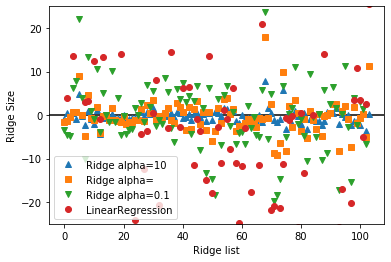

In [105]:
#alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사
#높은 alpha 값은 제약이 더 많은 모델, 작은 alpha 값일 때 보다 coef_의 절댓 값 크기가 작을 것으로 예상

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Ridge list")
plt.ylabel("Ridge Size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

In [108]:
#x = 0 은 첫번째 특성ㅇ ㅔ연관된 계수
#x = 1 은 두번째 특성에 연관된 계수. 이런식으로 x = 100 까지 계속 됨

#그림을 보면 Ridge가 10인 개체의 값이, [0] 회귀선과 가장 가깝다. -> 예측 모델이 제일 좋다.
#데이터 셋의 크기에 따라 모델의 성능 변화를 나타낸 그래프를 학습 곡선이라고 한다.

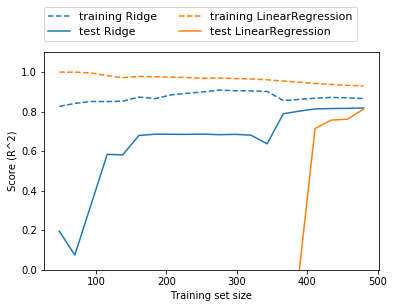

In [109]:
mglearn.plots.plot_ridge_n_samples()

In [112]:
#보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선
#설명 : 훈련(training) 이 test 보다 스코어가 높다.
#리지에는 reguarliation 이 적용되 linear보다 점수가 낮으나, linear은 데이터셋 400 개 이상부터 테스트가 가능

In [113]:
#Lasso (라소)
#Ridge의 대안으로 Lasso가 존재함. 리지처럼, 라소도 계수를 0에 가깝게 만듦.
#하지만, 방식이 조금 다르며 이를 L1 규제라고 함., L1 규제 결과로 라소를 사용할 때 어떤 계수는 정말 0이 됨.
#완전히 제외되는 특성이 생긴다는 뜻임. 특선선택이 자동으로 이루어지는 것 처럼 보여지기도 함.
#일부 계수를 0으로 만들면, 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 뭔지 알려줌

In [115]:
#오..! Lasso

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X7_train, y7_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X7_test, y7_test)))
print("사용한 특성의 개수 ", np.sum(lasso.coef_ != 0))


훈련 세트 점수: 0.27
테스트 세트 점수: 0.26
사용한 특성의 개수  3


In [116]:
X7.shape

(506, 104)

In [118]:
#라소의 훈/테 결과가 좋지 않음. 이는 과소적합이며, 104개 특성 중 3개만 썼다.. 켁
#Ridge와 마찬가지로 Lasso도 계수를 얼마나 강하게 0 으로 보낼지를 조절하는 alpha 매개 변수를 지원함.
#default = 1.0, 과소적합을 줄이기 위해 alpha 값을 줄여봄.

#alpha 를 줄인다 -> 과소적합을 줄임 
#이렇게 하려면 max_iter(반복 실행 최대 횟수) 기본 값을 늘려야 함.

In [124]:
#max_iter 를 증가시키지 않으면, 값을 늘리라는 경고가 발생함
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X7_train, y7_train)))
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X7_test, y7_test)))
print("사용한 특성의 개수 ", np.sum(lasso001.coef_ != 0))

#alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트 성능이 좋아짐.
#성능은 Ridge보다 조금 나은데, 사용된 특성이 34개라 '모델 분석이 좀 더 용이'
#그러나, alpha 값을 너무 낮추면 규제 효과가 없어져 과대적합이 되므로 LinearRegession 결과와 비슷해짐

훈련 세트 점수: 0.89
훈련 세트 점수: 0.80
사용한 특성의 개수  34


In [125]:
#라쏘는 엘라스틱넷 방식에서 L2 규제가 빠진것, glmnet의 lambda 매개 변수와 같은 의미임.
#한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent) 방식을 사용하며 학습 과정이 반복적으로
#여러번 진행되며 최적의 갑슬 찾아감, alpha 값은 줄이게 되면 가장 낮은 오차를 찾아가는 반복 횟수가 늘어남.
print("모델이 수행한 반복 횟수는, Lasso 객체 n_iter 속성에 저장 : ", lasso.n_iter_)

모델이 수행한 반복 횟수는, Lasso 객체 n_iter 속성에 저장 :  13


In [128]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X7_train, y7_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X7_train, y7_train)))
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X7_test, y7_test)))
print("사용한 특성의 개수 ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.94
훈련 세트 점수: 0.81
사용한 특성의 개수  95


Text(0.5, 0, 'Size')

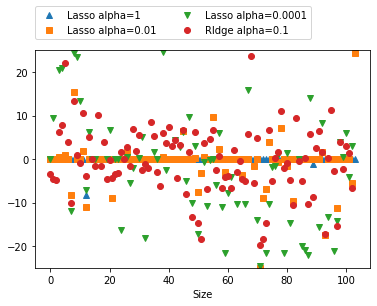

In [130]:
#alpha 값이 다른 모델들의 계수를 그려보자

plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
#릿지 있다 여기
plt.plot(ridge01.coef_, 'o', label="RIdge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("List")
plt.xlabel("Size")

In [131]:
#그래프 해석
#alpha = 1 일때, 계수 대부분이 0 일 뿐만 아니라 나머지 계수들고 크기가 작음
#alpha = 0.01 로 줄이면 대부분 특성이 0이 되는 -> 회귀선과 가까운 분포를 얻게됨
#alpha = 0.001 로 되면 계수 대부분이 0이 아니라, 값도 커져 규제받지 않은 모델을 얻게됨

#Ridge 와 비교하자면, 성능은 비슷하지만 어떤 계수도 0이 되진 않음.
#Ridge 가 더 선호되긴 하지만, Lasso는 특성이 많고 그 중 일부만 중요하다면 Lasso가 더 좋기도 함.

#싸이킷런은 ElasticNet도 제공함. 그러나, L1 규제와 L2 규제를 위한 매개 변수 두 개를 조정해야 함

##### 분류용 선형 모델

In [3]:
#이진 분류

# y^ = w[0] * x[0] + w[1] + w[1] + w[p] + x[p] + b > 0 특성들의 가중치 합
#가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교함.
#1. 함수에서 계산한 값이 0보다 작으면 클래스를 -1 
#2. 0보다 크면 +1 이라고 예측함
#이 규칙은 분류에 쓰이는 모든 선형모델에서 동일함, 계수(w) 와 절편(b)를 찾기 위한 방법이 많이 있다.

#회귀용 선형 모델에서는 출력 Y^이 특성의 선형 함수였음.
#즉, 직선, 평면, 초평면(차원이 3 이상일) 때 임.
#'분류용' 선형모델에서는 '결정 경계' 가 입력의 선형 함수임.
#즉, '이진 분류' 는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기임.

#선형 모델 학습 알고리즘은 두 방버으로 구분할 수 있다.

#1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정함
#2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지 판별

#알고리즘은 훈련 세트를 작 학습하는지 측정 방법마다 다 다름.
#계수(w) 와 (b) 를 조정하느 것은 불가. 손실함수에 대한 차이는 크게 중요 X

In [23]:
# linear_model.LogisticRegression : 이진 분류에서 로지스틱 손실함수를 사용, 다중 분류에서는 크로스 엔트로피 손실 함수를 사용한다..
# svm.linearSVC(support vector classifier) 에 구현된 선형 서포트 벡터 머신  에 구현된 서포트 벡터머신
# LogisticRegression 에 Regression(회귀) 가 들어가지만, 회귀 알고리즘이 아님.
# 분류 알고리즘이므로, LinearRegression 과 혼동하면 안된다.

In [25]:
X #forge 데이터셋의 첫번째 특성을 x축에 놓고, 두번째 특성을 y축에 놓음

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [26]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


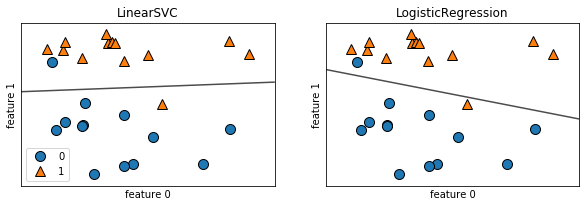

In [19]:
#forge 데이터셋으로 두 알고리즘 사용

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax = ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

In [22]:
#'결정경계' 직선으로 표현, 위쪽은 클래스 1 / 아래쪽은 클래스 0 으로 나눔.
#새로운 데이터 '결정 경계' 기준으로 특성에 따라 1과 0 으로 분류함.

# 두 모델은 비슷한 결정 경계를 만듦. 똑같이 포인트 두 개를 잘못 분류함.
#회귀에서 본 Ridge와 마찬가지로 두 모델은 기본적으로 L2 규제를 사용함

#Logistic Regression 과 LinearSVC 에서 두 규제의 강도를 결정하는 매개 변수는 C임
#C의 값이 높아지면 규제가 감소함.
#다시말해 매개변수로 높은 C 값을 지정하면 LogisticRegression 과 LinearSVC 는 훈련 세트에 가능한 최대에 맞추려 함
#반면에, C 값을 낮추면 모델은 계수 백터(w)가 0에 가까워지도록 만듦.

In [27]:
#C의 작동방식 : 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 함.
#C의 값을 높이면, 개개의 데이터 포인트를 정확히 분류하려고 노력할 것 임.

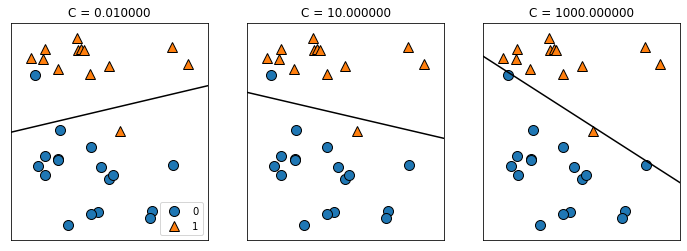

In [28]:
#linear SVC를 사용한 예제

mglearn.plots.plot_linear_svc_regularization()

In [30]:
# forge 데이터셋에 각기 다른 'C' 값으로 만든 선형 SVM 모델

#1번 그림은 아주 작은 C 값 때문에, 규제가 많이 적용 됨. 클래스 0의 대부분은 아래에 있고, 클래스 1의 대부분은 위에 존재
#규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만듦. -> 잘못 분류 데이터 2개

#중간 그림은 C 값이 조금 더 크며, 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐.

#오른쪽 그림에서 C 값을 아주 크게 함 -> 결정 경계는 더 기울어짐, 클래스 0의 모든 데이터 포인트를 올바르게 분류함
#이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없어, 클래스1의 포인트 하나는 여전히 잘못 분류됨

#오른쪽 그림의 모델은 모든 데이터 포인트를 정확하게 분류하려 애썼지만, 클래스의 전체적 배치를 잘 파악하지 못함
#=> 과대적합됨

#회귀와 비슷하게 분류에서 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이여
#매우 제한적인 것 처럼 보임. 하지만, '고차원에서는' 분류에 대한 선형 모델이 매우 강력해진다.
#특성이 많아지면, 과대적합 되지 않도록 하는 것이 매우 중요함.

In [31]:
#유방암 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 분석

from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [37]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg

#싸이킷런.. : https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

#기본값 C=1 인 훈련 세트와 테스트 세트 양쪽에 95% 정도로 훌륭한 성능을 냄.
#그러나, 훈련과 테스트의 성능이 매우 비슷하므로, 과소적합인 것 같다.

훈련 세트 점수 : 0.944
테스트 세트 점수 : 0.958


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

#C=100 을 사용하니, 훈련 세트의 정확도가 높아지고 테스트 세트의 정확도도 조금 증가함.
#LR이 복잡도가 높은 모델일수록, 성능이 좋다.

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.951


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
#규제 강화를 위해 C= 0.01을 사용하면?

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

#C=0.01 을 사용하니, 그림 2-1 처럼 왼쪽으로 더 이동하게 되어
#후련과 테스트 세트의 정확도는 기본 매개 변수일때보다 더 낮아짐.

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


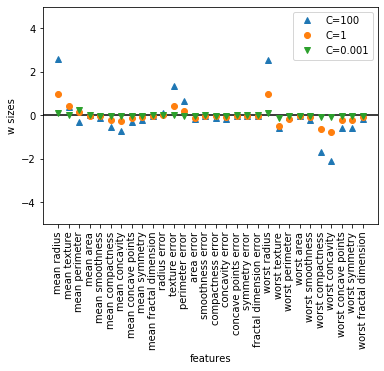

In [49]:
#매개변수 C 설정을 3가지로 하였을때, 학습시킨 모델의 계수 확인

#3개 logreg 모델 특성과 계수를 그래프 로 출력
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
#X축에, 특성들 쭉 나열
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("features")
plt.ylabel("w sizes")
plt.legend()

In [50]:
#LR은 기본적으로 L2 규제를 적용하므로, RIdge로 만든 모습과 비슷함.
#규제를 강하게 하면 할수록, 계수들은 0에 더 가깝게 만들지만 완전히 0이 되지는 않는다.
#자세히 보면, 세 번째 계수(mean perimeter) 에서 재미있는 현상 확인 가능

#C=100, C=1 일때 계수는 ㅇ므수지만, C=0.001 일때는 양수가 되며 C=1 일때보다 절댓값이 큼.
#이 같은 모델을 해석하면, 계수가 클래스의 특성과 연관성을 알려줌.

#ex : texture error 특성은 악성은 샘플과 관련이 깊음.
#그러나, mean perimeter 계수의 부호가 바뀌는것을 보아 높은 'mean perimeter' 값은 양성이나 악성의 신호 모두가 될 수 있음.

#그래서, 선형 모델의 계수는 '항상' 의심해보고 조심해서 해석해야 함.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


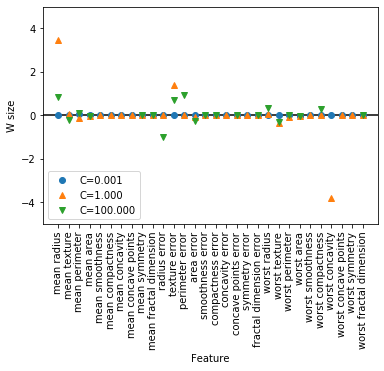

In [54]:
#L1 규제 : 이해는 쉬우나.. 모델이 몇 개의 특성만 사용하게 됨.

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)) )
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)) )
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("W size")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [ ]:
#유방암 데이터와 L1 규제를 사용하여, 각기 다른 C 값을 적용한 로지스틱 회귀 모델의 계수

#이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많음.
#회귀처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지, 일부 특성만을 사용할지 결정하는
#penalty 매개변수임.